170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


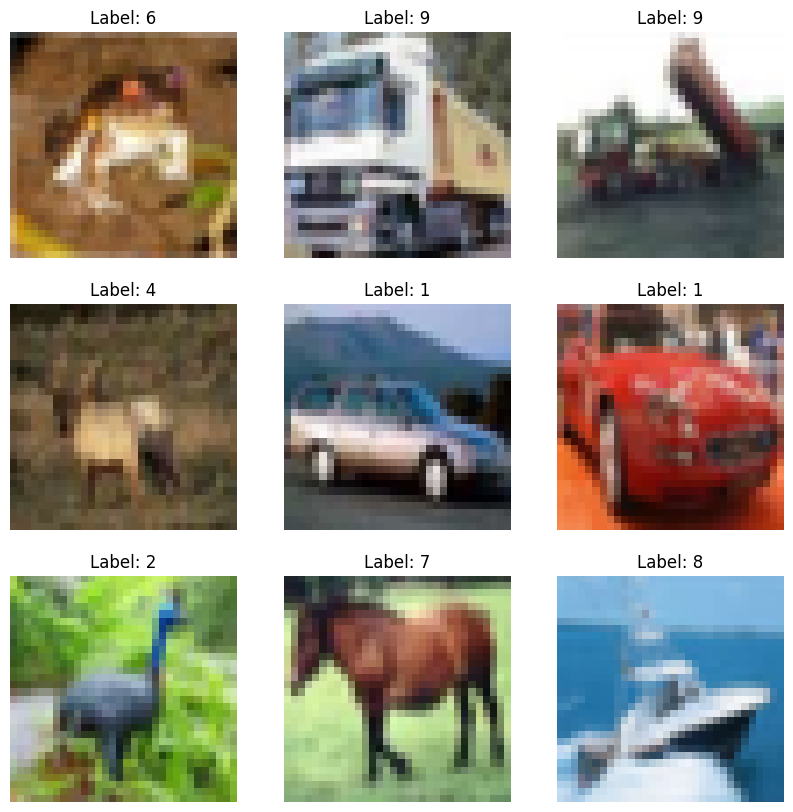

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.3321 - loss: 1.8052 - val_accuracy: 0.5296 - val_loss: 1.3322
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5794 - loss: 1.1845 - val_accuracy: 0.6167 - val_loss: 1.0732
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6531 - loss: 0.9819 - val_accuracy: 0.6580 - val_loss: 0.9682
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6980 - loss: 0.8572 - val_accuracy: 0.6955 - val_loss: 0.8598
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7374 - loss: 0.7491 - val_accuracy: 0.7133 - val_loss: 0.8216
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7622 - loss: 0.6896 - val_accuracy: 0.7274 - val_loss: 0.8005
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7803 - loss: 0.6270 - val_accuracy: 0.7124 - val_loss: 0.8403
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7964 - loss: 0.5768 - val_accuracy: 0

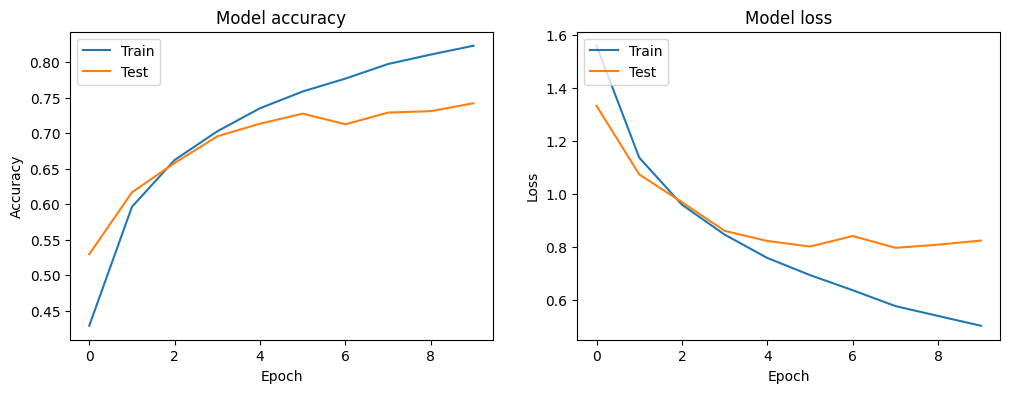

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data (scaling pixel values to [0, 1])
x_train, x_test = x_train / 255.0, x_test / 255.0

# Display some images from the dataset
def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i][0]}")
        plt.axis('off')
    plt.show()

# Display first 9 images from the training set
plot_images(x_train, y_train)

# Function to build a CNN model with adjustable parameters
def build_cnn_model(num_filters=32, kernel_size=3, num_layers=3, activation_function='relu'):
    model = models.Sequential()
    
    # Add the convolutional layers with padding to preserve spatial dimensions
    model.add(layers.Conv2D(num_filters, (kernel_size, kernel_size), activation=activation_function, padding='same', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Add more convolutional layers based on num_layers parameter
    for _ in range(num_layers-1):
        model.add(layers.Conv2D(num_filters, (kernel_size, kernel_size), activation=activation_function, padding='same'))
        model.add(layers.MaxPooling2D((2, 2)))
    
    # Flatten the output and add fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation=activation_function))
    model.add(layers.Dense(10, activation='softmax'))  # 10 classes for CIFAR-10
    
    return model

# Function to compile and train the model
def compile_and_train_model(model, x_train, y_train, x_test, y_test, learning_rate=0.001, batch_size=64, epochs=10):
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(x_test, y_test), verbose=1)
    
    return history

# Function to plot accuracy and loss graphs
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.show()

# Example of how learners can modify these parameters:
num_filters = 64  # Number of filters in convolutional layers
kernel_size = 3   # Size of the convolutional filters
num_layers = 4    # Number of convolutional layers
activation_function = 'relu'  # Activation function for convolutional layers
learning_rate = 0.001
batch_size = 64
epochs = 10

# Build and train the model
cnn_model = build_cnn_model(num_filters, kernel_size, num_layers, activation_function)
history = compile_and_train_model(cnn_model, x_train, y_train, x_test, y_test, learning_rate, batch_size, epochs)

# Plot the training history (accuracy and loss)
plot_training_history(history)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


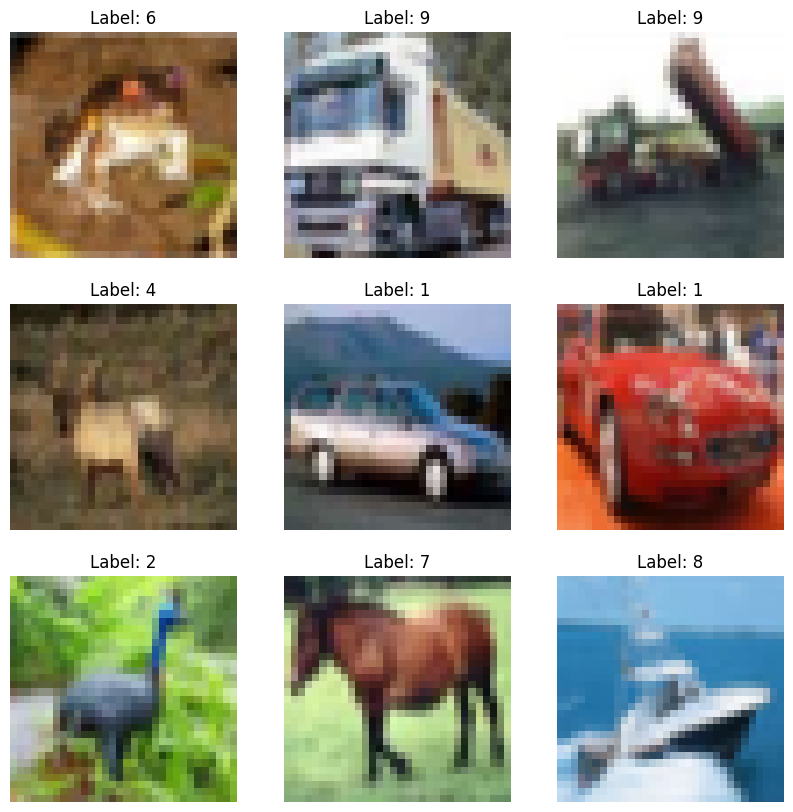

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3513 - loss: 1.7563 - val_accuracy: 0.5437 - val_loss: 1.2609
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5779 - loss: 1.1848 - val_accuracy: 0.6386 - val_loss: 1.0186
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6528 - loss: 0.9887 - val_accuracy: 0.6736 - val_loss: 0.9305
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6994 - loss: 0.8597 - val_accuracy: 0.6821 - val_loss: 0.9237
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7325 - loss: 0.7706 - val_accuracy: 0.6974 - val_loss: 0.8741
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7598 - loss: 0.6906 - val_accuracy: 0.7070 - val_loss: 0.8537
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7833 - loss: 0.6212 - val_accuracy: 0.7076 - val_loss: 0.8741
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8061 - loss: 0.5547 - val_accuracy: 0

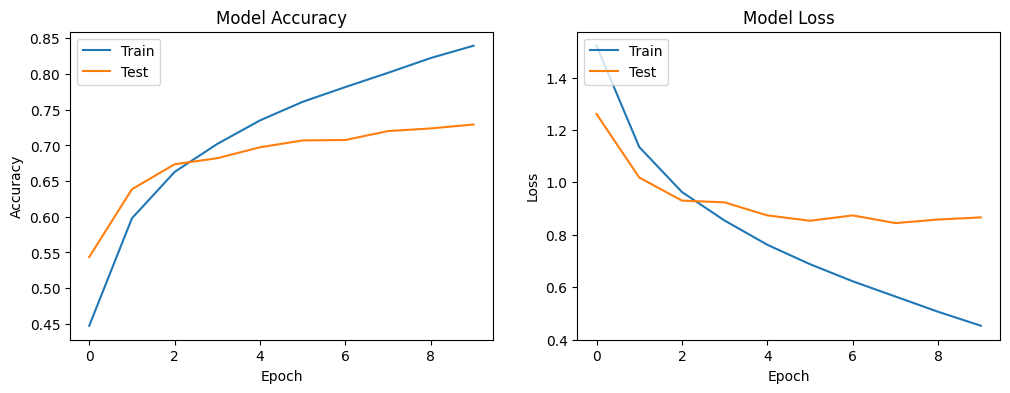

313/313 - 1s - 3ms/step - accuracy: 0.7293 - loss: 0.8664
Test accuracy: 0.7293000221252441


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Display sample images from the dataset
def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i][0]}")
        plt.axis('off')
    plt.show()

# Display the first 9 images from the training set
plot_images(x_train, y_train)

# Build the CNN model
def build_cnn_model():
    model = models.Sequential()
    
    # Convolutional layer with ReLU activation
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # First Convolution
    model.add(layers.MaxPooling2D((2, 2)))  # First Pooling

    # Second convolutional layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Third convolutional layer
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    
    # Flatten the output for the fully connected layer
    model.add(layers.Flatten())
    
    # Fully connected layer
    model.add(layers.Dense(128, activation='relu'))
    
    # Output layer for multi-class classification
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

# Compile and train the model
def compile_and_train_model(model, x_train, y_train, x_test, y_test):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))
    
    return history

# Build and train the CNN model
cnn_model = build_cnn_model()
history = compile_and_train_model(cnn_model, x_train, y_train, x_test, y_test)

# Plot training history for accuracy and loss
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.show()

# Plot the training history
plot_training_history(history)

# Evaluate the model on test data
test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


In [2]:
input_shape = (32, 32, 3)  # Example input shape
kernel_size = (3, 3)  # Kernel size
padding = 'valid'  # No padding

# Applying convolution
conv_layer = layers.Conv2D(32, kernel_size, padding=padding, input_shape=input_shape)
conv_layer_output = conv_layer.compute_output_shape(input_shape)
print(conv_layer_output)


ValueError: Kernel shape must have the same length as input, but received kernel of shape (3, 3, 3, 32) and input of shape (32, 32, 3).

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.3446 - loss: 1.7672 - val_accuracy: 0.5412 - val_loss: 1.2707
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5764 - loss: 1.2049 - val_accuracy: 0.6166 - val_loss: 1.0864
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6349 - loss: 1.0299 - val_accuracy: 0.6517 - val_loss: 0.9967
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6805 - loss: 0.9179 - val_accuracy: 0.6727 - val_loss: 0.9276
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7062 - loss: 0.8522 - val_accuracy: 0.6946 - val_loss: 0.8882
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7283 - loss: 0.7850 - val_accuracy: 0.7004 - val_loss: 0.8540
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7419 - loss: 0.7284 - val_accuracy: 0.7080 - val_loss: 0.8486
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7619 - loss: 0.6886 -

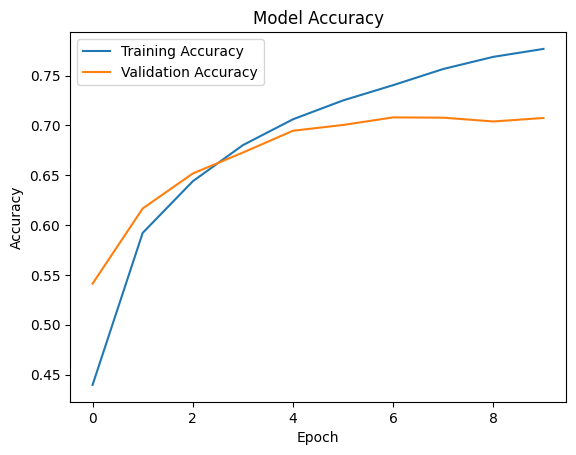

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data (scaling pixel values to [0, 1])
x_train, x_test = x_train / 255.0, x_test / 255.0

# Building the CNN model
def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile and train the model
model = build_cnn_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)

# Plotting the accuracy and loss curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
